In [10]:
import torch
import math
import matplotlib.pyplot as plt


In [35]:
class calculate():
  def __init__(self):
    self.value_x = torch.linspace(-math.pi, math.pi, 2000)
    self.target_y = self.target_function(self.value_x)
    self.learning_rate = 1e-3

    self.value_x_array = torch.unsqueeze(self.value_x, -1).pow(torch.tensor([1, 2, 3]))
    self.predict_model = self.build_network()
    self.loss_function = torch.nn.MSELoss(reduction='mean')
    
  def start_execute(self):
    for i in range(10000):
      self.predict_y = self.predict_model(self.value_x_array)
      loss = self.loss_function(self.predict_y, self.target_y)
      if (i+1) % 1000 == 0:
        print('loss is %10s'%loss.item())
      self.predict_model.zero_grad()
      loss.backward()
      with torch.no_grad():
        for each_param in self.predict_model.parameters():
          each_param -= self.learning_rate * each_param.grad

  def build_network(self):
    return torch.nn.Sequential(torch.nn.Linear(3,1),
                               torch.nn.Flatten(0,1))

  def target_function(self, value_x):
    return torch.sin(value_x)
    

注意展开的过程，使用flatten，将输出从（2000,1）展开为（2000，），

其中flatten的默认参数为1,1，因此需要将第一个换成第0轴，使得完全展开

In [36]:
demo_test = calculate()
demo_test.start_execute()

loss is 0.14142750203609467
loss is 0.021950889378786087
loss is 0.0066644796170294285
loss is 0.00470042834058404
loss is 0.004446645732969046
loss is 0.004413601476699114
loss is 0.004409254528582096
loss is 0.004408675245940685
loss is 0.004408597014844418
loss is 0.004408585373312235


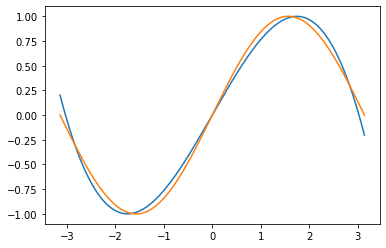

In [37]:
plt.plot(demo_test.value_x.tolist(), demo_test.predict_y.tolist())
plt.plot(demo_test.value_x.tolist(), demo_test.target_y.tolist())

In [52]:
class calculate2(calculate):
  def __init__(self):
    super().__init__()
    self.optimizer = torch.optim.Adam(self.predict_model.parameters(), lr=self.learning_rate)
  
  def start_execute(self):
    for i in range(10000):
      self.predict_y = self.predict_model(self.value_x_array)
      loss = self.loss_function(self.predict_y, self.target_y)
      if (i+1) % 1000 == 0:
        print('loss is %10s'%loss.item())
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()



In [53]:
demo_test2 = calculate2()
demo_test2.start_execute()

loss is 0.03335856646299362
loss is 0.013181558810174465
loss is 0.005526892375200987
loss is 0.004443077370524406
loss is 0.004408682230859995
loss is 0.004408583510667086
loss is 0.004408583510667086
loss is 0.004408583976328373
loss is 0.004408583510667086
loss is 0.004408583510667086


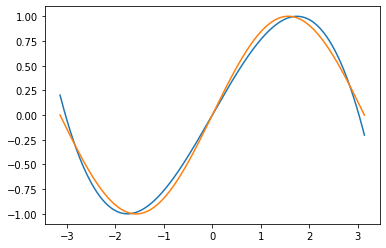

In [54]:
plt.plot(demo_test2.value_x.tolist(), demo_test2.predict_y.tolist())
plt.plot(demo_test2.value_x.tolist(), demo_test2.target_y.tolist())